# 1.) Pull in Data and Convert ot Monthly

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [12]:
# Difference in stockprice
df["Diff"] = df.diff().shift(-1)
df.head()
df["Target"] = np.sign(df["Diff"])
df["Premium"] = 0.08*df["Adj Close"]

In [24]:
df.head()

,Adj Close,Diff,Target,Premium,Prediction,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097592,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006910,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [14]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [15]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [16]:
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [17]:
df["Prediction"] = y_pred

In [25]:
df["Profits"] =0.

#True Positives
df.loc[(df["Prediction"] ==1)& (df["Target"] ==1),"Profits"] = df["Premium"]

#False Positives
df.loc[(df["Prediction"] ==1)& (df["Target"] ==-1),"Profits"] = 100*df["Diff"]+df["Premium"]

#False Negatives
df.loc[(df["Prediction"] ==-1)& (df["Target"] ==1),"Profits"] = df["Premium"]

#Positives Negatives
df.loc[(df["Prediction"] ==1)& (df["Target"] ==1),"Profits"] = 100*df["Diff"]+df["Premium"]

# 5.) Plot profits over time

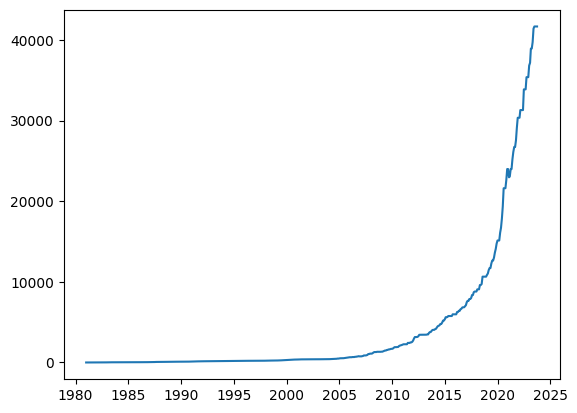

In [27]:
plt.plot(np.cumsum(df['Profits']))
plt.show()

### 5.5
### From the excellent lecture, I saw the application of data science in movie tickets and I admired the lecturer's skills in machine learning. I hope that I will have a chance to engage in this field.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.